## Seaborn taxi plots

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
cols=['tpep_pickup_datetime',
      'passenger_count',
      'trip_distance',
      'total_amount']
df1 = pd.read_csv('../data/nyc_taxi_2020-01.csv', usecols = cols, parse_dates=['tpep_pickup_datetime'], low_memory= False)
df2 = pd.read_csv('../data/nyc_taxi_2020-07.csv', usecols = cols, parse_dates=['tpep_pickup_datetime'], low_memory= False)

df = pd.concat([df1, df2])
df1 = df1.drop(columns=cols)
df2 = df2.drop(columns=cols)


df.head()

,tpep_pickup_datetime,passenger_count,trip_distance,total_amount
0,2020-01-01 00:28:15,1.0,1.2,11.27
1,2020-01-01 00:35:39,1.0,1.2,12.30
2,2020-01-01 00:47:41,1.0,0.6,10.80
3,2020-01-01 00:55:23,1.0,0.8,8.16
4,2020-01-01 00:01:58,1.0,0.0,4.80


In [3]:
df['year'] = df['tpep_pickup_datetime'].dt.year
df['month'] = df['tpep_pickup_datetime'].dt.month
df['day'] = df['tpep_pickup_datetime'].dt.day
df.head()

,tpep_pickup_datetime,passenger_count,trip_distance,total_amount,year,month,day
0,2020-01-01 00:28:15,1.0,1.2,11.27,2020,1,1
1,2020-01-01 00:35:39,1.0,1.2,12.30,2020,1,1
2,2020-01-01 00:47:41,1.0,0.6,10.80,2020,1,1
3,2020-01-01 00:55:23,1.0,0.8,8.16,2020,1,1
4,2020-01-01 00:01:58,1.0,0.0,4.80,2020,1,1


In [4]:
df.count()

tpep_pickup_datetime    7205420
passenger_count         7077132
trip_distance           7205420
total_amount            7205420
year                    7205420
month                   7205420
day                     7205420
dtype: int64

In [5]:
df = df.loc[(df['month'].isin([1, 7])) & 
            (df['year'] == 2020)]
df.count()

tpep_pickup_datetime    7205204
passenger_count         7076916
trip_distance           7205204
total_amount            7205204
year                    7205204
month                   7205204
day                     7205204
dtype: int64

In [6]:
df.index.is_unique

False

In [7]:
df_ = df
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7205204 entries, 0 to 800411
Data columns (total 7 columns):
 #   Column                Dtype         
---  ------                -----         
 0   tpep_pickup_datetime  datetime64[ns]
 1   passenger_count       float64       
 2   trip_distance         float64       
 3   total_amount          float64       
 4   year                  int32         
 5   month                 int32         
 6   day                   int32         
dtypes: datetime64[ns](1), float64(3), int32(3)
memory usage: 486.3 MB


In [8]:
df = df.reset_index(drop=True)
df

,tpep_pickup_datetime,passenger_count,trip_distance,total_amount,year,month,day
0,2020-01-01 00:28:15,1.0,1.20,11.27,2020,1,1
1,2020-01-01 00:35:39,1.0,1.20,12.30,2020,1,1
2,2020-01-01 00:47:41,1.0,0.60,10.80,2020,1,1
3,2020-01-01 00:55:23,1.0,0.80,8.16,2020,1,1
4,2020-01-01 00:01:58,1.0,0.00,4.80,2020,1,1
...,...,...,...,...,...,...,...
7205199,2020-07-19 13:27:52,NaN,24.23,83.50,2020,7,19
7205200,2020-07-19 13:02:00,NaN,4.40,19.78,2020,7,19
7205201,2020-07-19 13:32:00,NaN,8.78,38.45,2020,7,19
7205202,2020-07-19 13:28:00,NaN,6.50,29.77,2020,7,19


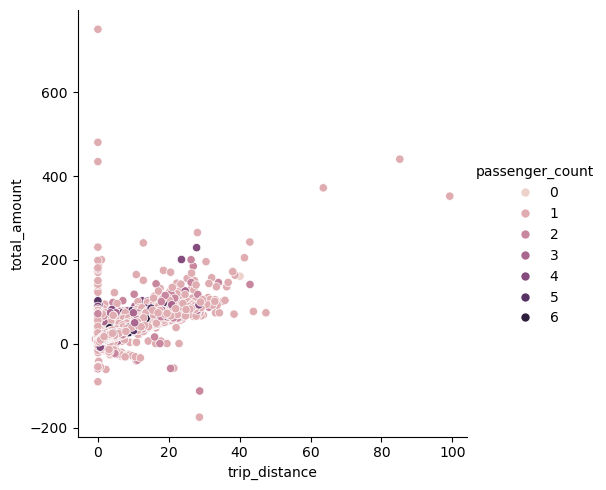

In [9]:
df = df_.sample(frac=0.01)

sns.relplot(x = 'trip_distance',
            y = 'total_amount',
            data = df,
            hue='passenger_count')

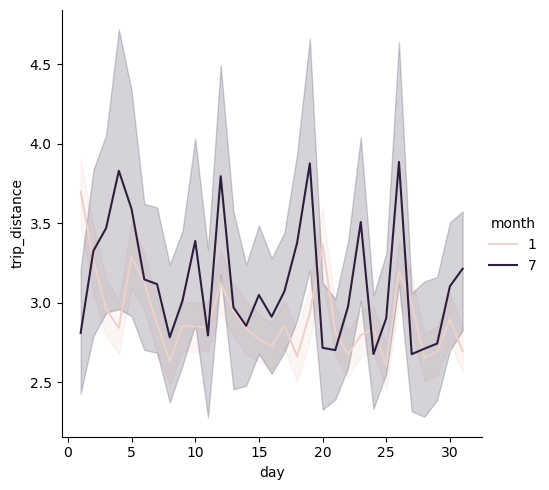

In [10]:
df = df_.sample(frac=0.01)
df = df_.sample(frac=0.01)
sns.relplot(x='day', y='trip_distance', 
            kind='line',
            data=df, 
            hue='month')

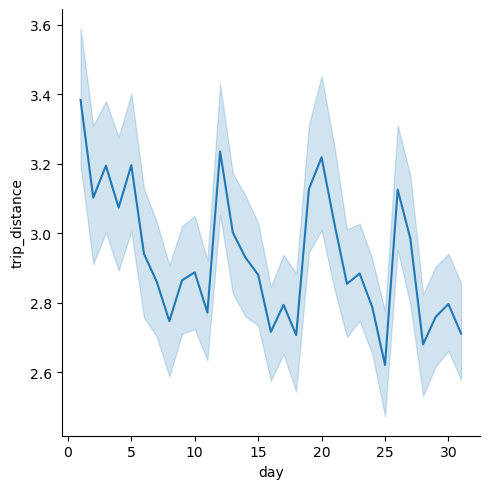

In [11]:
df = df_.sample(frac=0.01)
sns.relplot(x='day', y='trip_distance', 
            kind='line',
            data=df[df['month']== 1])

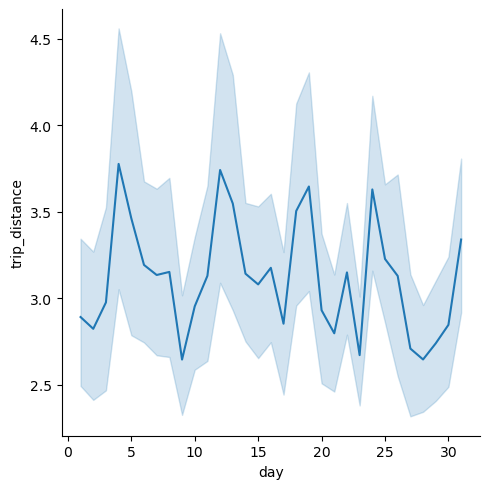

In [12]:
df = df_.sample(frac=0.01)
sns.relplot(x='day', y='trip_distance', 
            kind='line',
            data=df[df['month']== 7])

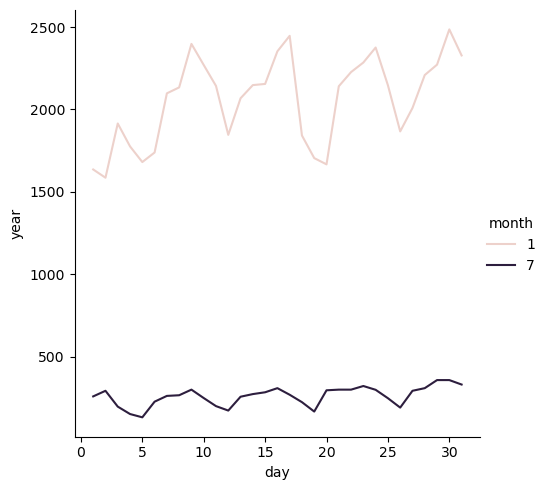

In [13]:
df = df_.sample(frac=0.01)
sns.relplot(x='day', y='year', 
            hue='month', kind='line', 
            data=df.groupby(['month', 'day'])[['year']].count().reset_index(),
            errorbar=None)

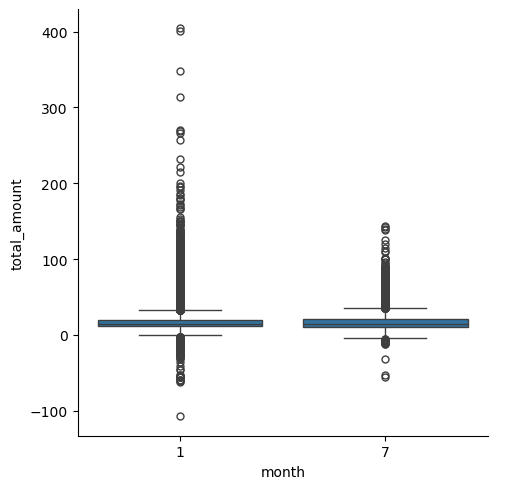

In [14]:
df = df_.sample(frac=0.01)
sns.catplot(x='month', y='total_amount', data=df, kind='box')

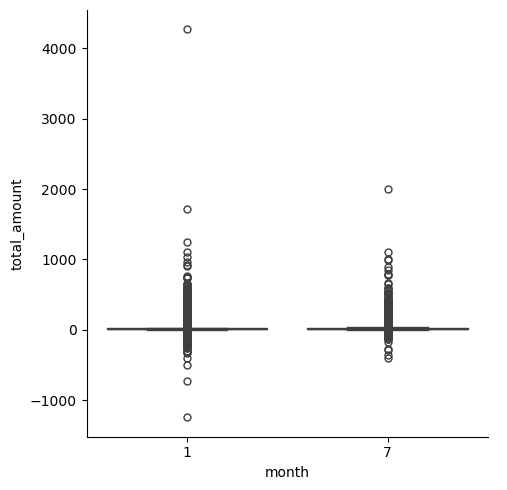

In [15]:
sns.catplot(x='month', y='total_amount', data=df_, kind='box')

In [16]:
cols=['tpep_pickup_datetime',
      'passenger_count',
      'trip_distance',
      'total_amount']

df_ = df_.drop(columns=['day', 'month', 'year'])

df1 = pd.read_csv('../data/nyc_taxi_2019-01.csv', usecols = cols, parse_dates=['tpep_pickup_datetime'], low_memory= False)
df2 = pd.read_csv('../data/nyc_taxi_2019-07.csv', usecols = cols, parse_dates=['tpep_pickup_datetime'], low_memory= False)

df = pd.concat([df_, df1, df2])

df1 = df1.drop(columns=cols)
df2 = df2.drop(columns=cols)
df_ = df_.drop(columns=cols)

df['year'] = df['tpep_pickup_datetime'].dt.year
df['month'] = df['tpep_pickup_datetime'].dt.month
df['day'] = df['tpep_pickup_datetime'].dt.day

df = df.loc[(df['month'].isin([1, 7])) & (df['year'].isin([2019, 2020]))]

df_ = df

df.head()

,tpep_pickup_datetime,passenger_count,trip_distance,total_amount,year,month,day
0,2020-01-01 00:28:15,1.0,1.2,11.27,2020,1,1
1,2020-01-01 00:35:39,1.0,1.2,12.30,2020,1,1
2,2020-01-01 00:47:41,1.0,0.6,10.80,2020,1,1
3,2020-01-01 00:55:23,1.0,0.8,8.16,2020,1,1
4,2020-01-01 00:01:58,1.0,0.0,4.80,2020,1,1


In [19]:

df[['passenger_count',
    'trip_distance',
    'total_amount']] = df[['passenger_count',
                           'trip_distance',
                           'total_amount']].astype(np.float32)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 21182601 entries, 0 to 6310418
Data columns (total 7 columns):
 #   Column                Dtype         
---  ------                -----         
 0   tpep_pickup_datetime  datetime64[ns]
 1   passenger_count       float32       
 2   trip_distance         float32       
 3   total_amount          float32       
 4   year                  int32         
 5   month                 int32         
 6   day                   int32         
dtypes: datetime64[ns](1), float32(3), int32(3)
memory usage: 808.1 MB


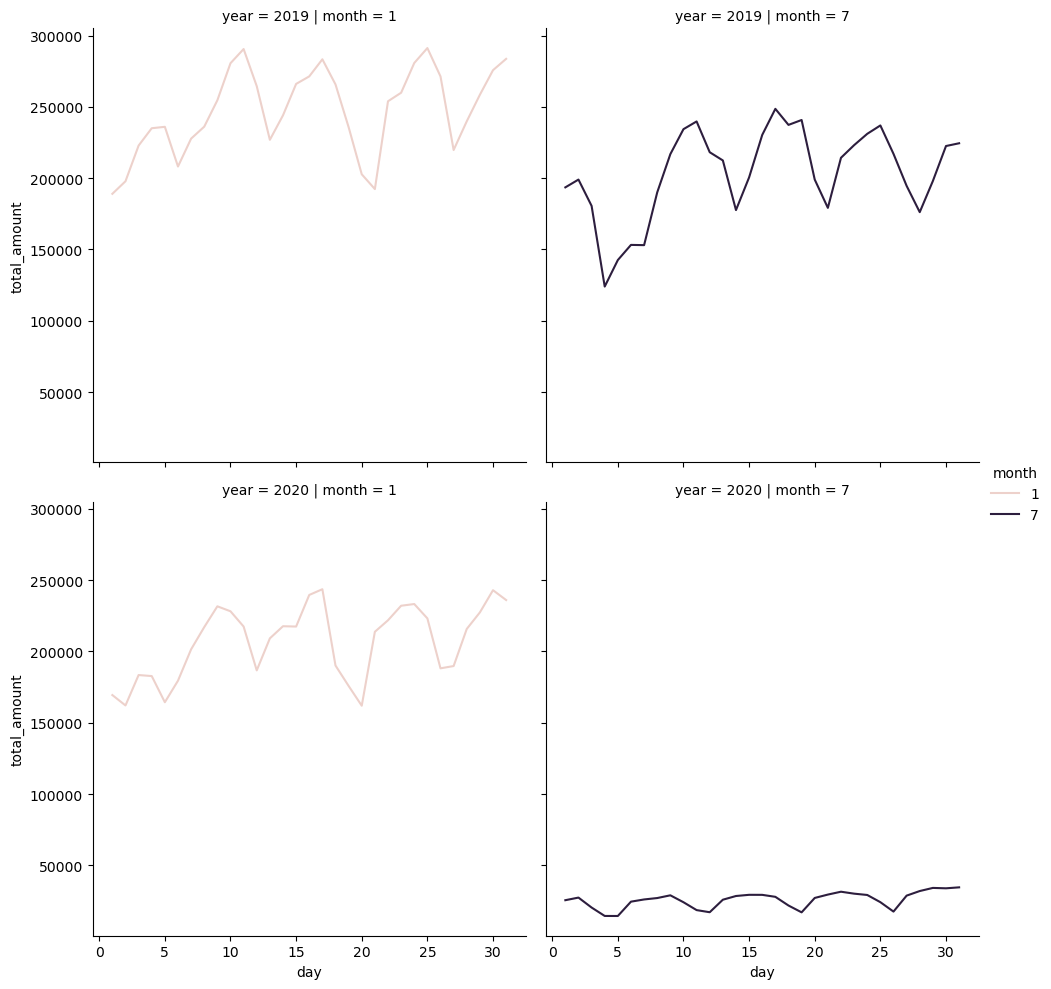

In [21]:
sns.relplot(x='day', y='total_amount', 
            hue='month', kind='line', 
            row='year', col='month',
            data=df.groupby(['year','month', 'day'])[['total_amount']].count().reset_index(),
            errorbar=None)

In [22]:
df = df.reset_index(drop=True)

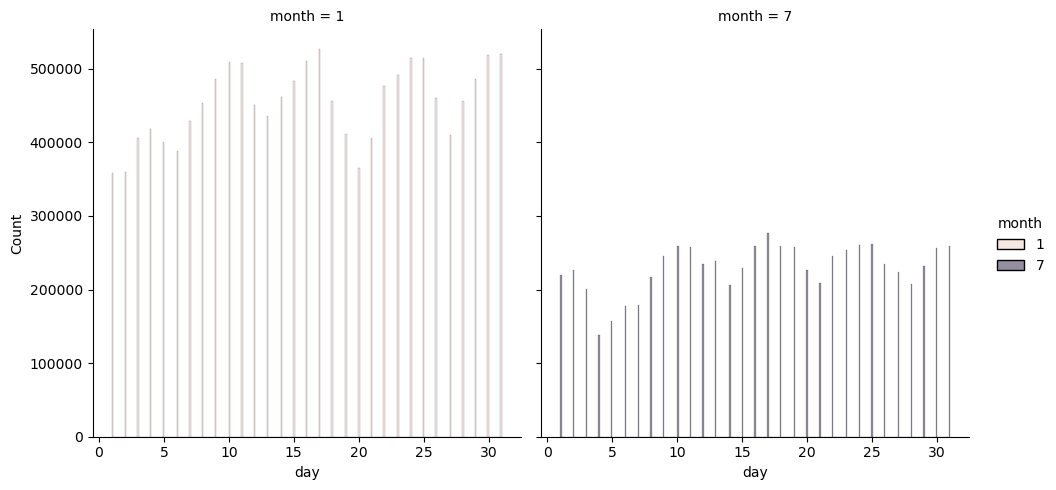

In [24]:
sns.displot(x='day', data=df, hue='month', col='month')

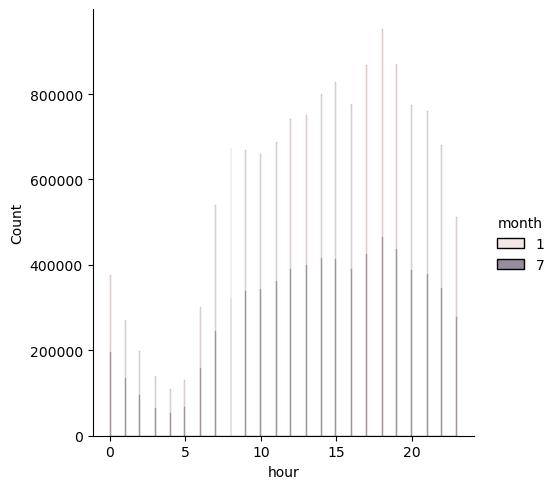

In [25]:
df['hour'] = df['tpep_pickup_datetime'].dt.hour

sns.displot(data=df, x='hour', hue='month')